In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Customers.csv')
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
# taking the last 2 columns for our clustering
X=dataset.iloc[:,[3,4]].values

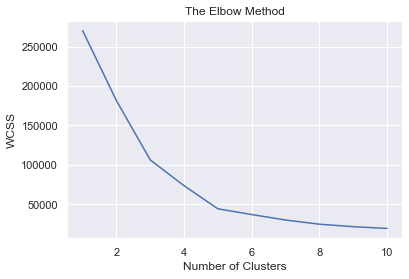

In [4]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = [] # wcss means Within-Cluster-Sum-of-Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In the above graph we can see that at points 5 we can see a sudden decrete in the line so we will consider n_clusters = 5

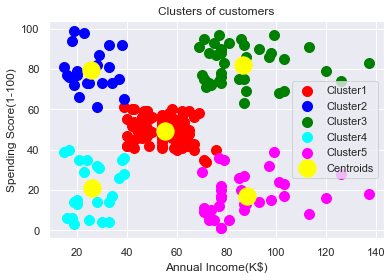

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

#Visualize the clusters

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()